In [22]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Loading datasets

books_df = pd.read_csv("C:/Users/Lithium/Downloads/Book Recommendation system/Books.csv")
users_df = pd.read_csv("C:/Users/Lithium/Downloads/Book Recommendation system/Users.csv")
ratings_df = pd.read_csv("C:/Users/Lithium/Downloads/Book Recommendation system/Ratings.csv")

<ipython-input-2-0e7414b2fcc6>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv("C:/Users/Lithium/Downloads/Book Recommendation system/Books.csv")


In [3]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
books_df.shape


(271360, 8)

In [7]:
# checking for null values

books_df.isnull().sum()  

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
ratings_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [9]:
#checking for duplicate values

books_df.duplicated().sum()

0

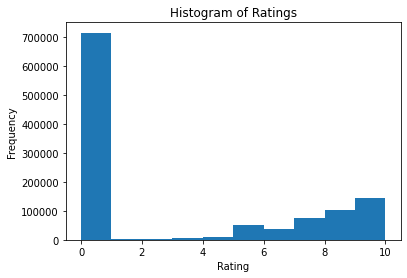

In [11]:
#EDA  : dustribution of ratings


plt.hist(ratings_df['Book-Rating'], bins=10) 
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.show()



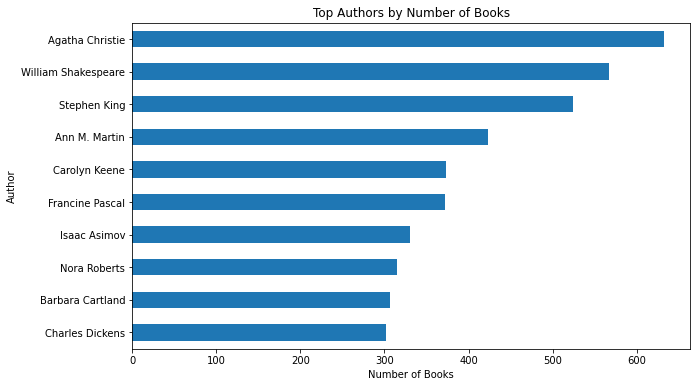

In [21]:


# Counting the number of books for each author
author_counts = books_df['Book-Author'].value_counts()

top_authors = author_counts.head(10)   

# Plot the horizontal bar graph
plt.figure(figsize=(10, 6))  
top_authors.sort_values().plot(kind='barh')  # Sorting the values before plotting
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.title('Top Authors by Number of Books')
plt.show()

The above plot illustrates the top 10 authors with the highest number of books available.

In [106]:
#Building a popularity-based recommendation system based on average ratings.
# joining ratings_df and books_df on ISBN column   

ratings_with_books=ratings_df.merge(books_df, on = 'ISBN')
ratings_with_books.head()




,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [176]:
# grouping df on book title and count the number of ratings each book received


num_ratings=ratings_with_books.groupby("Book-Title").count()["Book-Rating"].reset_index()
num_ratings.rename(columns={"Book-Rating": "num_ratings"}, inplace=True)
num_ratings.head()

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [177]:
# finding avg ratings of each book

avg_rating_df = ratings_with_books.groupby("Book-Title")[["Book-Rating"]].mean()
avg_rating_df.rename(columns={"Book-Rating": "Avg-Rating"}, inplace=True)
avg_rating_df

,Avg-Rating
Book-Title,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.250000
Always Have Popsicles,0.000000
Apple Magic (The Collector's series),0.000000
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.000000
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.000000
...,...
Ã?Â?lpiraten.,0.000000
Ã?Â?rger mit Produkt X. Roman.,5.250000
Ã?Â?sterlich leben.,7.000000


In [179]:
#merging dfs again in Book Title

popularity_df=num_ratings.merge(avg_rating_df, on = "Book-Title")
popularity_df.head()


,Book-Title,num_ratings,Avg-Rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00


In [180]:
#filter books which has number of ratings more than 250 and sort them on basis of avg rating:highest on top

popularity_df = popularity_df[popularity_df['num_ratings'] >= 250].sort_values("Avg-Rating", ascending=False)
popularity_df


,Book-Title,num_ratings,Avg-Rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
...,...,...,...
227701,Vinegar Hill (Oprah's Book Club (Paperback)),265,2.245283
233635,Whispers,286,2.199301
143377,Presumed Innocent,294,2.139456
94382,Isle of Dogs,288,2.000000


In [182]:
# merging dataframes , dropping duplicates and selecting required column only

popular_books_df = popularity_df.merge(books_df, on="Book-Title").drop_duplicates("Book-Title")[["Book-Title", "Book-Author", "Year-Of-Publication", "Image-URL-S", "num_ratings", "Avg-Rating"]]


In [183]:
# checking structure and columns of dataframe
popular_books_df


,Book-Title,Book-Author,Year-Of-Publication,Image-URL-S,num_ratings,Avg-Rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
...,...,...,...,...,...,...
716,Vinegar Hill (Oprah's Book Club (Paperback)),A. Manette Ansay,1998,http://images.amazon.com/images/P/0380730138.0...,265,2.245283
717,Whispers,BELVA PLAIN,1994,http://images.amazon.com/images/P/0440216745.0...,286,2.199301
727,Presumed Innocent,Scott Turow,1989,http://images.amazon.com/images/P/0446359866.0...,294,2.139456
733,Isle of Dogs,Patricia Cornwell,2002,http://images.amazon.com/images/P/0425182908.0...,288,2.000000


## Implementeing a collaborative filtering recommendation system using the user-item matrix.


In [ ]:
x=ratings_with_books.groupby("User-ID").count()["Book-Rating"] >200 # Boolean indexing
freq_user= x[x].index   # fetching index 

In [186]:
filtered_df=ratings_with_books[ratings_with_books["User-ID"].isin(freq_user)]
filtered_df.head()                                

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [188]:
# Getting titles of books that have received more than 50 ratings, storing them in the variable famous_books. 
#These books are considered popular or well-known within the dataset due to their higher number of ratings.

y=ratings_with_books.groupby("Book-Title").count()["Book-Rating"]>50
famous_books=y[y].index

In [160]:
final_ratings=filtered_df[filtered_df['Book-Title'].isin(famous_books)]
pt=final_ratings.drop_duplicates().pivot_table(index="Book-Title", columns="User-ID", values= "Book-Rating")

In [161]:
pt.fillna(0, inplace=True)
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0


In [162]:
from sklearn.metrics.pairwise import cosine_similarity

## Computing similarity scores between items (books) based on user ratings and used these scores to recommend similar items to users

In [163]:
#The cosine_similarity function calculates the cosine similarity between all pairs of items (books) based on 
#their ratings in the user-item matrix.

similarity_score= cosine_similarity(pt)

In [165]:
def recommend(book_name):
    #index fetch krna hain, index leke, similarity score me jake distnace nikaal lenge
    index= np.where(pt.index==book_name)[0][0]
    similar_items= sorted(list(enumerate(similarity_score[index])), key= lambda x: x[1], reverse=True)[1:6]
    
    for i in similar_items:
        print(pt.index[i[0]])
    

In [166]:
pt.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
# checking if recommender system is wroking fine
recommend("Message in a Bottle")

Nights in Rodanthe
The Loop: A Novel
The Mulberry Tree
A Walk to Remember
River's End


In [92]:
recommend("The Notebook")

A Walk to Remember
The Rescue
Gates of Paradise
One Door Away from Heaven
Toxin


In [37]:
recommend("The Da Vinci Code")

Angels &amp; Demons
Doing Good
Touching Evil
TickTock
The Arraignment


In [38]:
import pickle

In [189]:
#These lines save essential data objects in binary format using pickle, 
#facilitating their reuse in Streamlit for book recommendation.

pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books_df,open('books_df.pkl','wb'))
pickle.dump(similarity_score,open('similarity_score.pkl','wb'))
pickle.dump(popular_books_df, open('popular_books_df.pkl', 'wb'))
pickle.dump(ratings_with_books, open('ratings_with_books.pkl', 'wb'))